# Using Data Science to Understand What Makes Wine Taste Good

## Section 1: Data Exploration

In this section, we'll do some exploratory analysis to understand the nature of our data and the underlying distribution.

### First, import some necessary libraries. 

### Click the below cell block and run it.

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

### Next, we'll load the dataset for white wines, and display the first 5 columns. Run the below cell block

In [3]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-white.csv", sep=';')

# Display the first five records
display(data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Now, let's do some basic preliminary analysis of our data:

### We'll begin by first seeing if our data has any missing information

In [5]:
# buscar nulos
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Examine the features in the data-set and their data types

In [0]:
# información de tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
# analitica descriptiva básica
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Section 2: Exploring Relationships between features

In [9]:
# Explorar las relaciones entre variables
crr = data.corr()
crr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.0226973,0.289181,0.0890207,0.0230856,-0.0493959,0.0910698,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.0226973,1,-0.149472,0.0642861,0.0705116,-0.0970119,0.0892605,0.0271138,-0.0319154,-0.0357281,0.0677179,-0.194723
citric acid,0.289181,-0.149472,1,0.0942116,0.114364,0.0940772,0.121131,0.149503,-0.163748,0.0623309,-0.0757287,-0.00920909
residual sugar,0.0890207,0.0642861,0.0942116,1,0.0886845,0.299098,0.401439,0.838966,-0.194133,-0.0266644,-0.450631,-0.0975768
chlorides,0.0230856,0.0705116,0.114364,0.0886845,1,0.101392,0.19891,0.257211,-0.0904395,0.0167629,-0.360189,-0.209934
free sulfur dioxide,-0.0493959,-0.0970119,0.0940772,0.299098,0.101392,1,0.615501,0.29421,-0.000617796,0.0592172,-0.250104,0.00815807
total sulfur dioxide,0.0910698,0.0892605,0.121131,0.401439,0.19891,0.615501,1,0.529881,0.00232097,0.134562,-0.448892,-0.174737
density,0.265331,0.0271138,0.149503,0.838966,0.257211,0.29421,0.529881,1,-0.0935915,0.0744931,-0.780138,-0.307123
pH,-0.425858,-0.0319154,-0.163748,-0.194133,-0.0904395,-0.000617796,0.00232097,-0.0935915,1,0.155951,0.121432,0.0994272
sulphates,-0.017143,-0.0357281,0.0623309,-0.0266644,0.0167629,0.0592172,0.134562,0.0744931,0.155951,1,-0.0174328,0.0536779


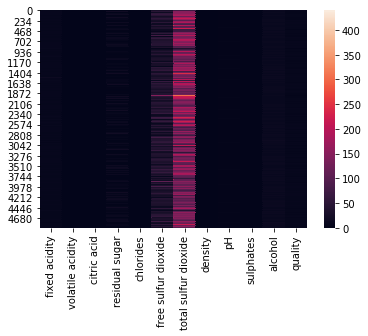

In [14]:
# Matriz de correlaciones
# sugerencia correlation = data.corr()
# sugerencia 2: sns.heatmap()
# correlation = data.corr()
# sns.heatmap(data)

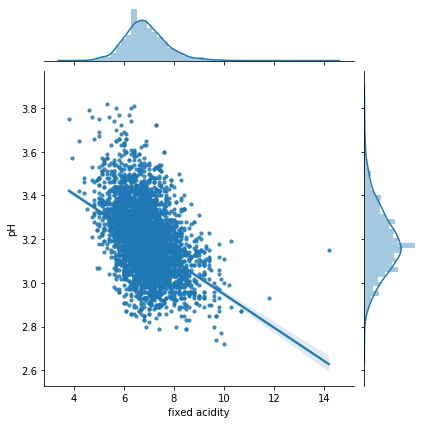

In [16]:
import seaborn as sns
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)


#### Citric_acid and fixed acidity

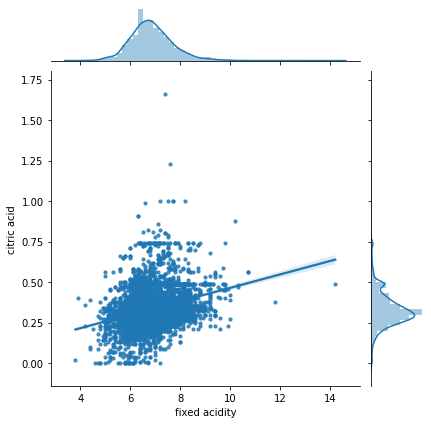

In [19]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['citric acid', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="citric acid", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### density and fixed acidity

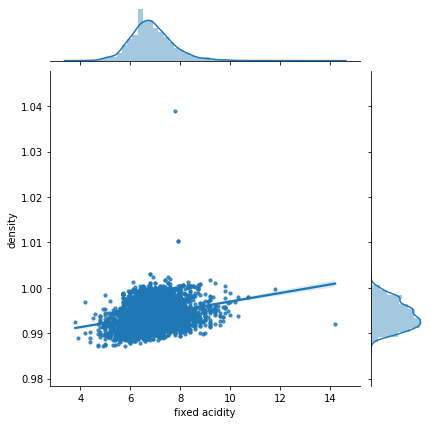

In [20]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['density', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="density", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### quality and volatile acidity

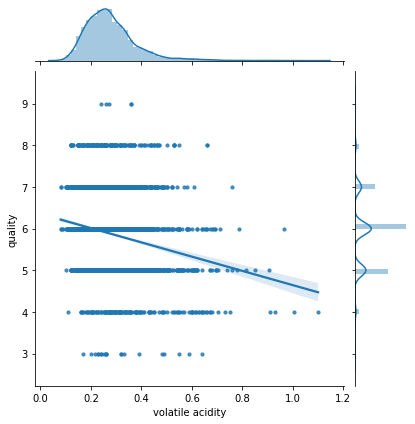

In [31]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
volatility_quality = data[['quality', 'volatile acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="volatile acidity", y="quality", data=volatility_quality, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### alcohol and quality

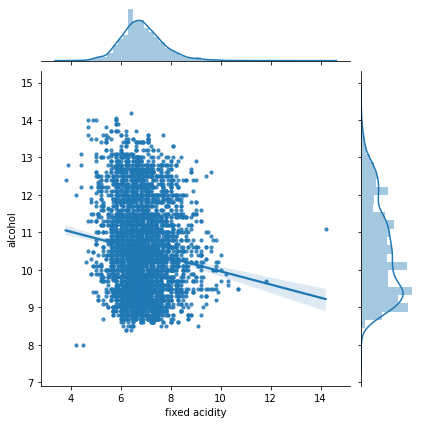

In [37]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
alcohol_quality = data[['alcohol', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="alcohol", data=alcohol_quality, height=6)

# #Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### Barplot quality and volatile acidity

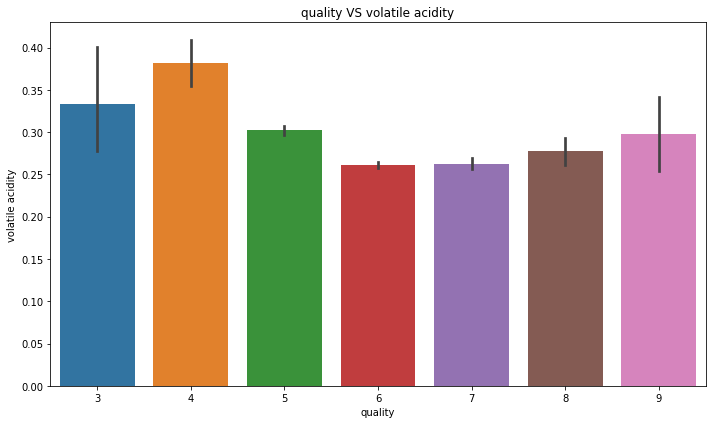

<Figure size 432x288 with 0 Axes>

In [39]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatility_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

#### Barplot quality and alcohol

ValueError: ignored

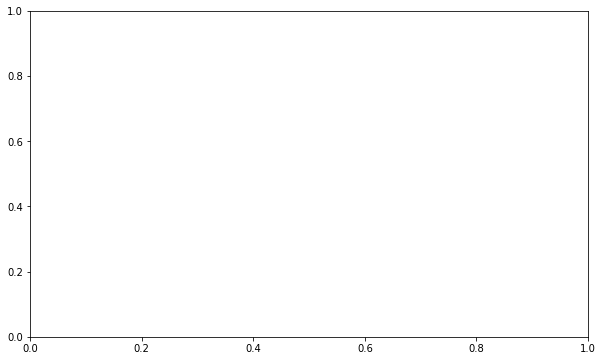

In [41]:
#We can visualize relationships of discreet values better with a bar plot

# fig, axs = plt.subplots(ncols=1,figsize=(10,6))
# sns.barplot(x='quality', y='volatile acidity', data=alcohol_quality, ax=axs)
# plt.title('quality VS volatile acidity')

# plt.tight_layout()
# plt.show()
# plt.gcf().clear()

## Outlier Detection:

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An **outlier step** is calculated as **1.5** times the **interquartile range (IQR)**. A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below:

* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.
* Optionally remove data points from the dataset by adding indices to the outliers list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [42]:
# For each feature find the data points with extreme high or low values


for feature in data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    aux = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))
    print(indexOf())
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
# pd.series([False]).repeat(size) //reset_index()
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
358,10.0,0.200,0.39,1.40,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,4.7,0.335,0.14,1.30,0.036,69.0,168.0,0.99212,3.47,0.46,10.5,5
4786,4.4,0.320,0.39,4.30,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.20,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8
4792,4.7,0.785,0.00,3.40,0.036,23.0,134.0,0.98981,3.53,0.92,13.8,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
23,7.6,0.670,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5
79,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5
147,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.99510,3.38,0.36,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,4.4,0.540,0.09,5.1,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4860,6.0,0.520,0.33,7.7,0.046,24.0,119.0,0.99224,3.04,0.38,11.0,6
4867,5.3,0.600,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.0,6
4877,5.9,0.540,0.00,0.8,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6
54,6.8,0.20,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6
62,7.0,0.47,0.07,1.10,0.035,17.0,151.0,0.99100,3.02,0.34,10.5,5
65,6.2,0.35,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4808,7.3,0.35,0.67,8.30,0.053,10.0,100.0,0.99590,3.19,0.50,10.9,5
4815,6.2,0.76,0.01,3.20,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7
4847,4.4,0.54,0.09,5.10,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4877,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
23,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,5
35,7.3,0.28,0.43,1.7,0.080,21.0,123.0,0.99050,3.19,0.42,12.80,5
40,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.99370,3.11,0.36,9.40,6
41,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.40,6
54,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4813,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.70,5
4820,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.70,5
4836,6.7,0.50,0.36,11.5,0.096,18.0,92.0,0.99642,3.11,0.49,9.60,5
4845,6.6,0.38,0.29,2.4,0.136,15.0,93.0,0.99336,3.18,0.60,9.50,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.99870,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
1940,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
1942,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
2127,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2378,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
115,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
250,5.9,0.210,0.28,4.6,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
320,6.0,0.100,0.24,1.1,0.041,15.0,65.0,0.99270,3.61,0.61,10.3,7
507,6.0,0.240,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4565,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4567,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4601,6.9,0.230,0.35,6.9,0.030,45.0,116.0,0.99244,2.80,0.54,11.0,6
4744,5.0,0.240,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.8,0.220,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.600000,6
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.700000,6
209,6.1,0.400,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.500000,6
245,6.1,0.180,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.300000,6
339,6.6,0.180,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.200000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.98981,3.53,0.92,13.800000,6
4815,6.2,0.760,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.700000,7
4818,6.0,0.270,0.40,1.7,0.021,18.0,82.0,0.98910,3.24,0.95,13.133333,6
4886,6.2,0.210,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.150000,7


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


# Part 2: Using Machine Learning to Predict the Quality of Wines

In [51]:
#Displays the first 5 columns
display(data.head(n=5))
data_drop_quality = data.drop('quality', 1)
label = data.quality
# Split the data into features and target label
# data
data_train, data_test, label_train, label_test = train_test_split(data_drop_quality, label, test_size=0.2, random_state=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Next, shuffle and split our data-set into training and testing subsets:

In [0]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets


# Show the results of the split


### Implementation: Initial Model Evaluation


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

In [0]:

# print("Linear RMSE: {}".format(rmse))
# accuracy = model.score(X_test,y_test)
# print("Accuracy Linear: {}".format(accuracy))
# R2 = r2_score(y_test, y_pred)
# print("R2 Linear: {}".format(R2))
# print("")

# print("Lasso RMSE: {}".format(rmse_lasso))
# accuracy_lasso = model2.score(X_test,y_test)
# print("Accuracy Lasso: {}".format(accuracy_lasso))
# R2_lasso = r2_score(y_test, y_pred2)
# print("R2 Lasso: {}".format(R2_lasso))
# print("")

# print("Ridge RMSE: {}".format(rmse_ridge))
# accuracy_ridge = model_ridge.score(X_test,y_test)
# print("Accuracy Ridge: {}".format(accuracy_ridge))
# R2_ridge = r2_score(y_test, y_pred_ridge)
# print("R2 Ridge: {}".format(R2_ridge))
# print("")
    

Linear RMSE: 0.6598453517957835
Accuracy Linear: 0.2513476761101383
R2 Linear: 0.2513476761101383

Lasso RMSE: 0.8566989697343049
Accuracy Lasso: 0.028000011184232676
R2 Lasso: 0.028000011184232676

Ridge RMSE: 0.8566989697343049
Accuracy Ridge: 0.028000011184232676
R2 Ridge: 0.028000011184232676

